# Credit Card Fraud Detection

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [5]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Exploratory Data Analysis

In [7]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


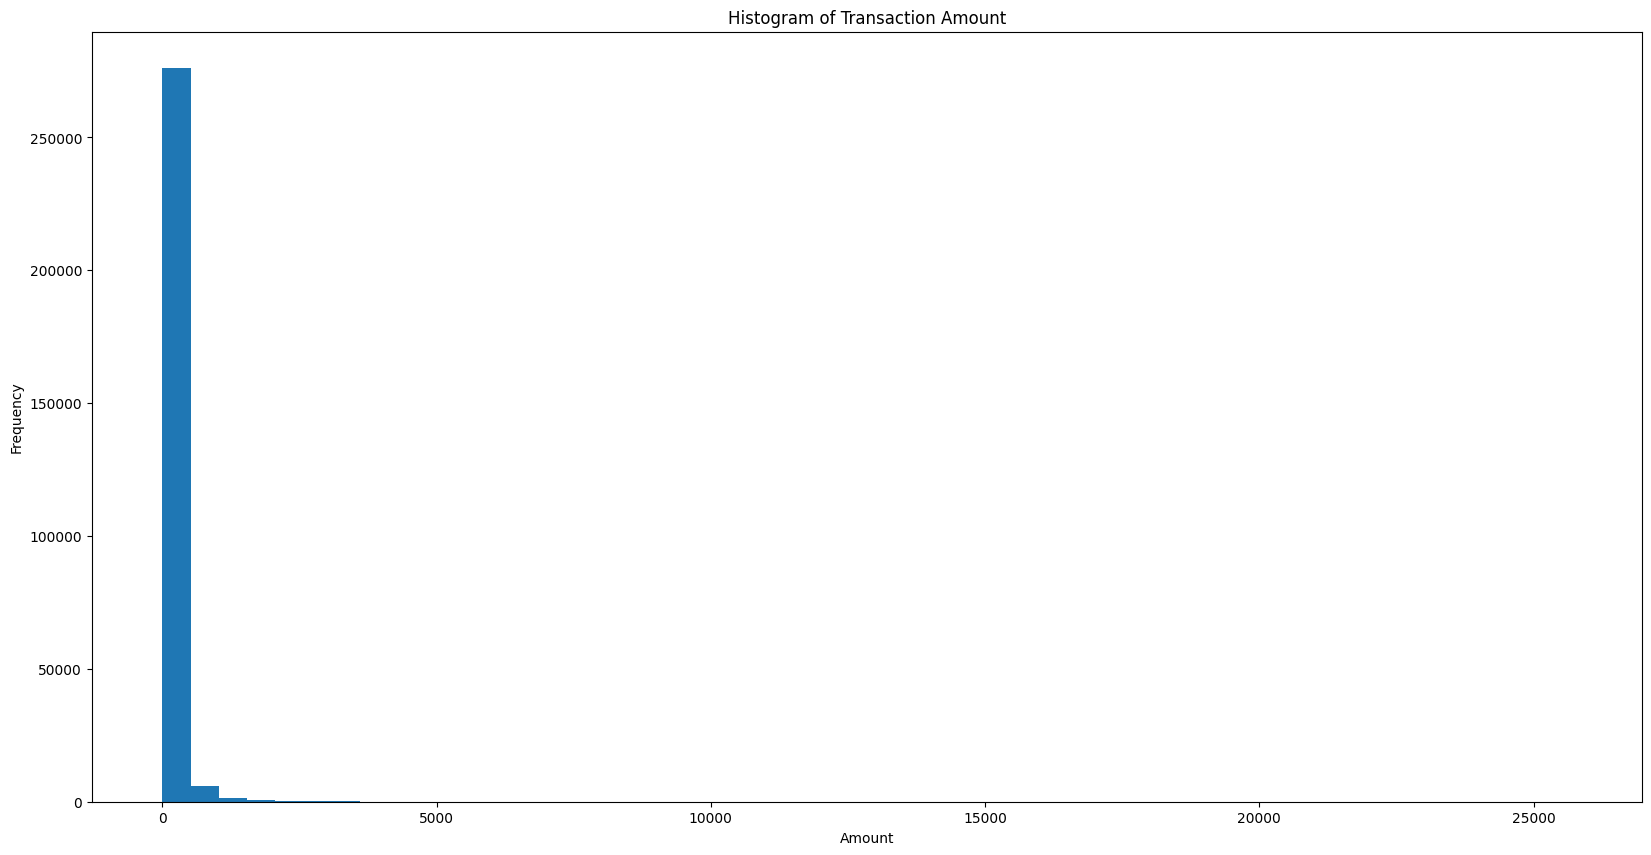

In [10]:
plt.hist(df['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount')
plt.show()


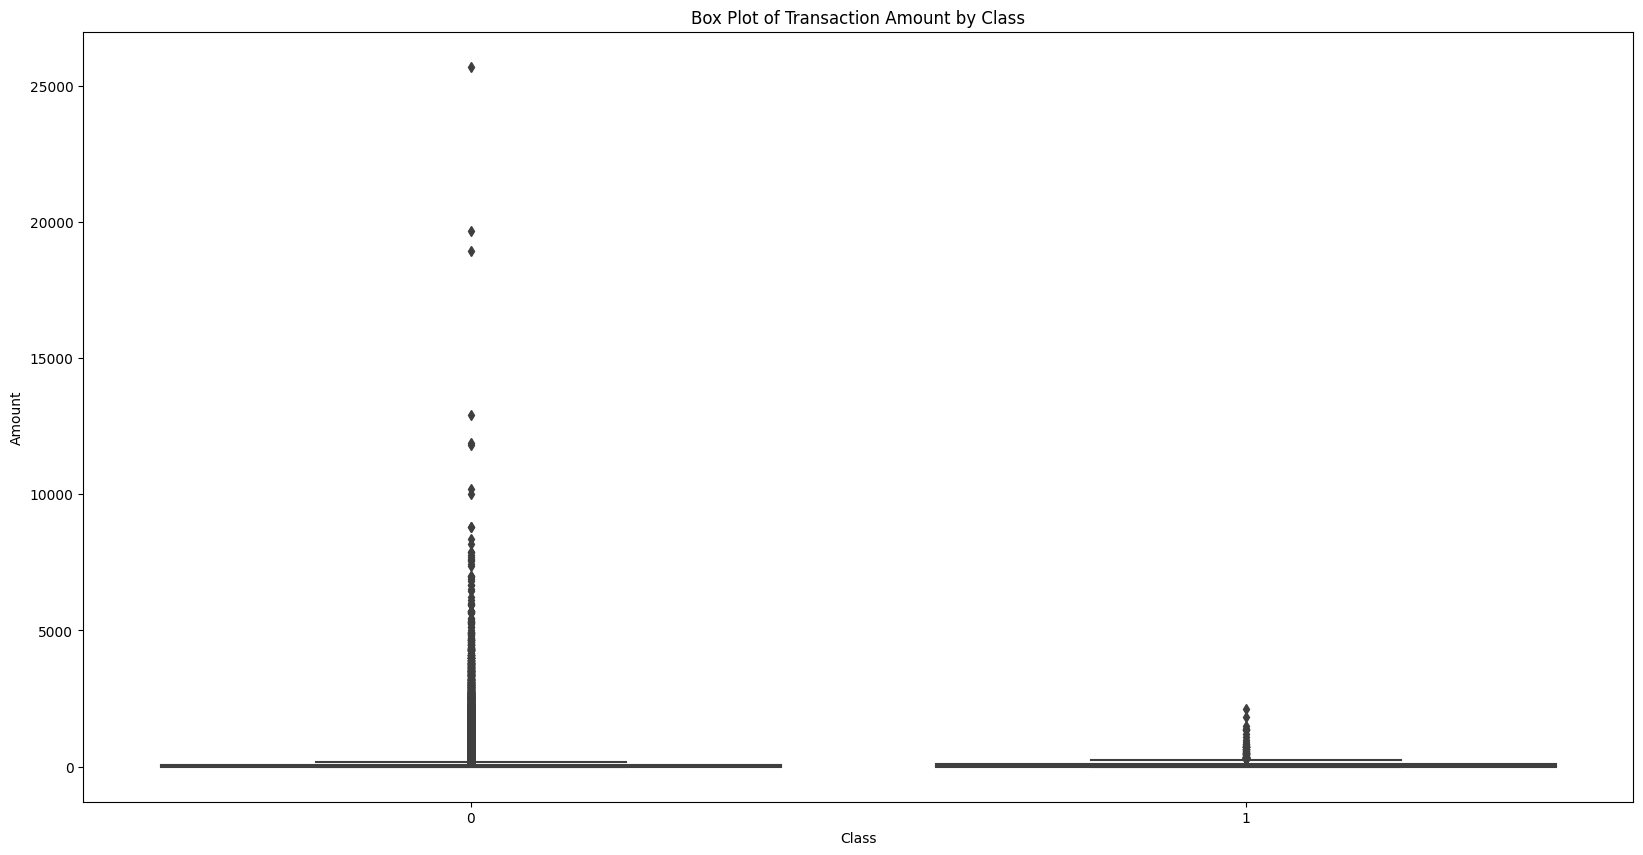

In [11]:
sns.boxplot(x = 'Class', y ='Amount' , data = df)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Box Plot of Transaction Amount by Class')
plt.show()

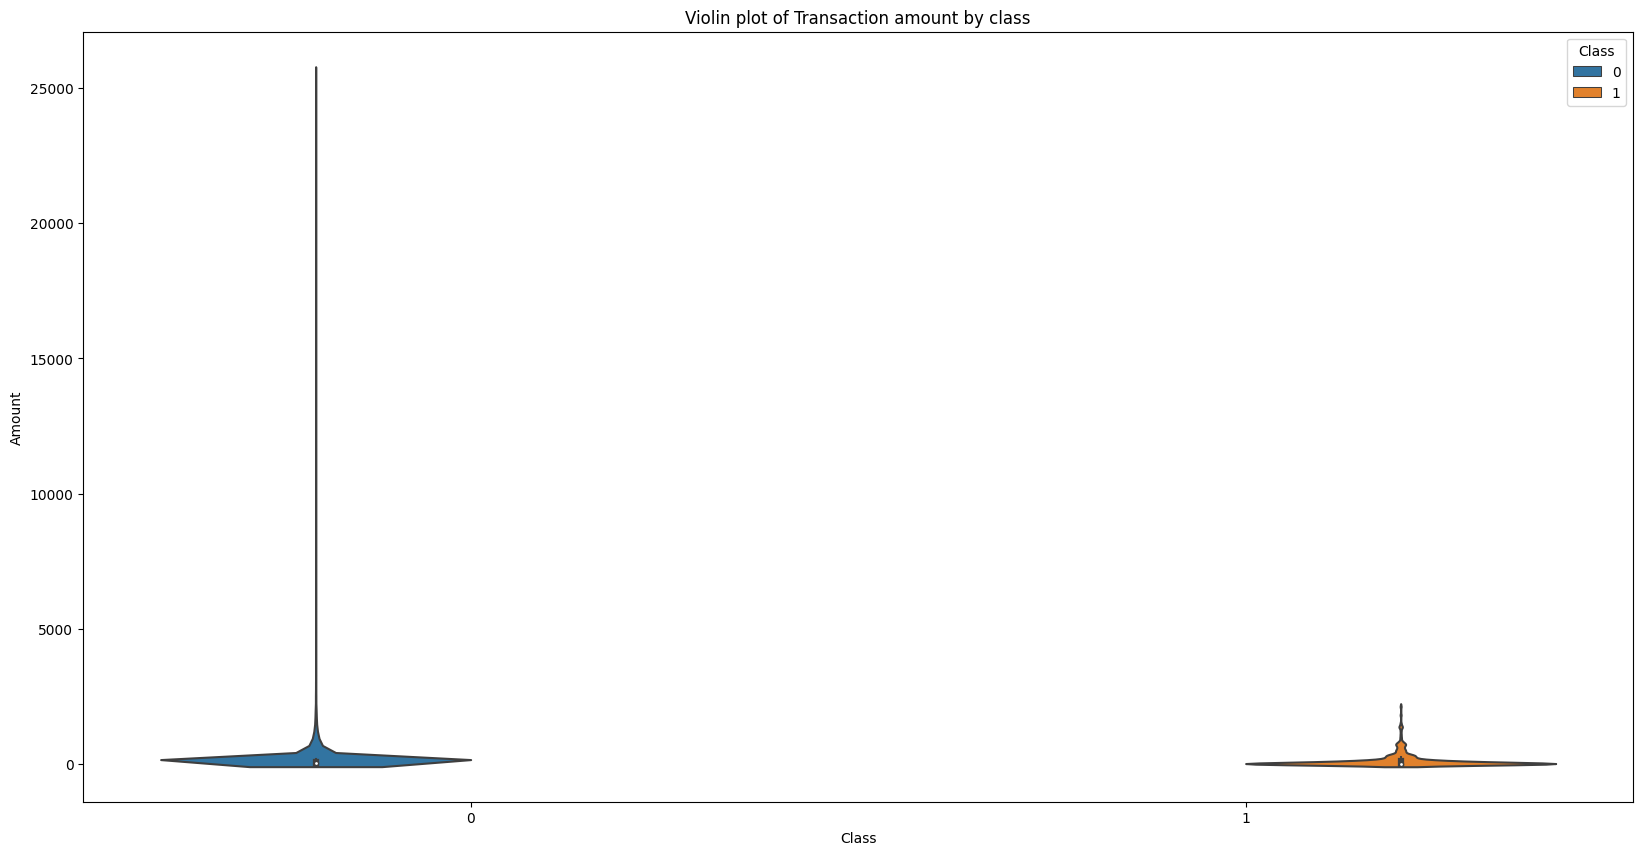

In [12]:
sns.violinplot(x = 'Class', y= 'Amount',data = df, bw = 0.2, hue = 'Class' )
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Violin plot of Transaction amount by class')
plt.show()


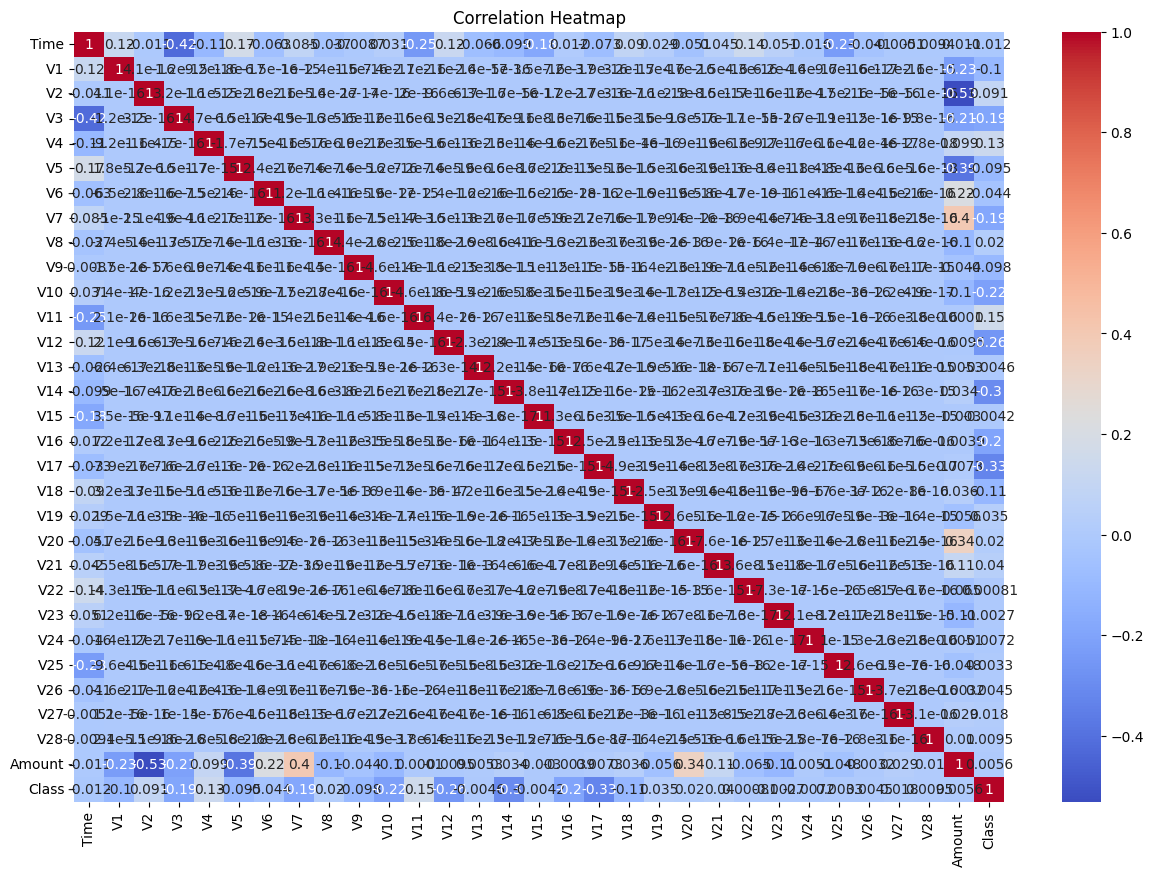

In [13]:
corr = df.corr()
matplotlib.rcParams["figure.figsize"]=(15,10)
sns.heatmap(corr, cmap ='coolwarm', annot = True)
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
df.head()
#median = df['Amount'].median()
#min_value = df['Amount'].min()
#max_value = df['Amount'].max()

#print('Median:', median)
#print('IQR:', IQR)
#print('Minimum:', min_value)
#print('Maximum:', max_value)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Amount','Time']]= scaler.fit_transform(df[['Amount','Time']])
#print(df[['Amount', 'Time']])

## Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('Class', axis =1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [19]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
260291,0.922992,2.008678,-0.417842,-0.680107,0.360350,-0.242482,-0.023237,-0.510269,0.020606,1.155425,...,-0.149377,-0.257353,-0.670293,0.269757,-1.090587,-0.465835,0.044733,-0.015994,-0.045938,0.162547
142877,0.491886,-3.019125,3.676753,-1.665704,0.456419,-0.807676,-1.397271,0.164419,0.830868,0.948286,...,1.084965,-0.163536,0.559295,0.190264,0.383593,-0.231729,-0.508051,-0.059086,-0.649342,0.009702
179123,0.717243,2.109657,0.521720,-3.470093,0.469621,1.471653,-1.005073,0.604578,-0.211299,0.042212,...,-0.194453,-0.077397,-0.124418,-0.114196,-0.121005,0.403125,0.705635,-0.096363,-0.032713,0.004119
156743,0.629893,-0.501650,0.528513,0.928346,-1.256275,2.659054,4.175553,-0.124988,0.844914,1.362456,...,0.136523,-0.312409,-0.561977,-0.267003,0.597666,0.301067,-0.706981,-0.060370,-0.152430,0.008184
184305,0.730305,1.920395,-0.675053,-0.956858,-0.387362,-0.696090,-1.067888,-0.113260,-0.238384,1.230176,...,-0.108463,0.354253,1.394160,-0.094750,0.718779,0.239138,1.004214,-0.073988,-0.075201,0.243902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135732,0.470964,-1.945611,1.645678,-0.063891,1.716029,-1.395291,-1.057649,-0.532792,1.148104,-0.554903,...,-0.123091,0.182157,0.258846,0.003427,0.698181,0.010753,-0.145296,-0.164749,-0.038597,0.183252
117935,0.433352,1.346465,-0.500611,0.624692,-0.705316,-0.948892,-0.476496,-0.675131,-0.082215,-0.812790,...,0.110134,0.147230,0.401925,0.031926,0.116531,0.316709,-0.256962,0.036784,0.021013,0.086721
148895,0.522583,0.116804,1.124966,-0.189357,-0.411574,1.179856,-0.677778,1.114330,-0.460061,1.417527,...,0.049699,-0.532265,-0.991069,0.079980,0.418580,-0.452823,0.039088,-0.097230,-0.151803,0.048726
164985,0.677854,-0.348972,0.457716,1.467516,-0.683567,0.106562,0.005166,0.242253,0.133368,0.345197,...,-0.059041,0.240587,0.777556,-0.177885,0.789717,-0.365805,0.501540,0.119394,0.165962,0.062331


## Handling Class Imbalance

###### Oversampling with SMOTE
###### Ensemble methods using Random Forest

In [20]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Model Selection

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


In [23]:
logistic_regression =LogisticRegression(random_state = 42)
logistic_regression.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=42)

In [24]:
y_pred_lr = logistic_regression.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred_lr))
print("AUC: " , roc_auc_score(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50490
           1       0.08      0.92      0.15        91

    accuracy                           0.98     50581
   macro avg       0.54      0.95      0.57     50581
weighted avg       1.00      0.98      0.99     50581

AUC:  0.9522494934259641


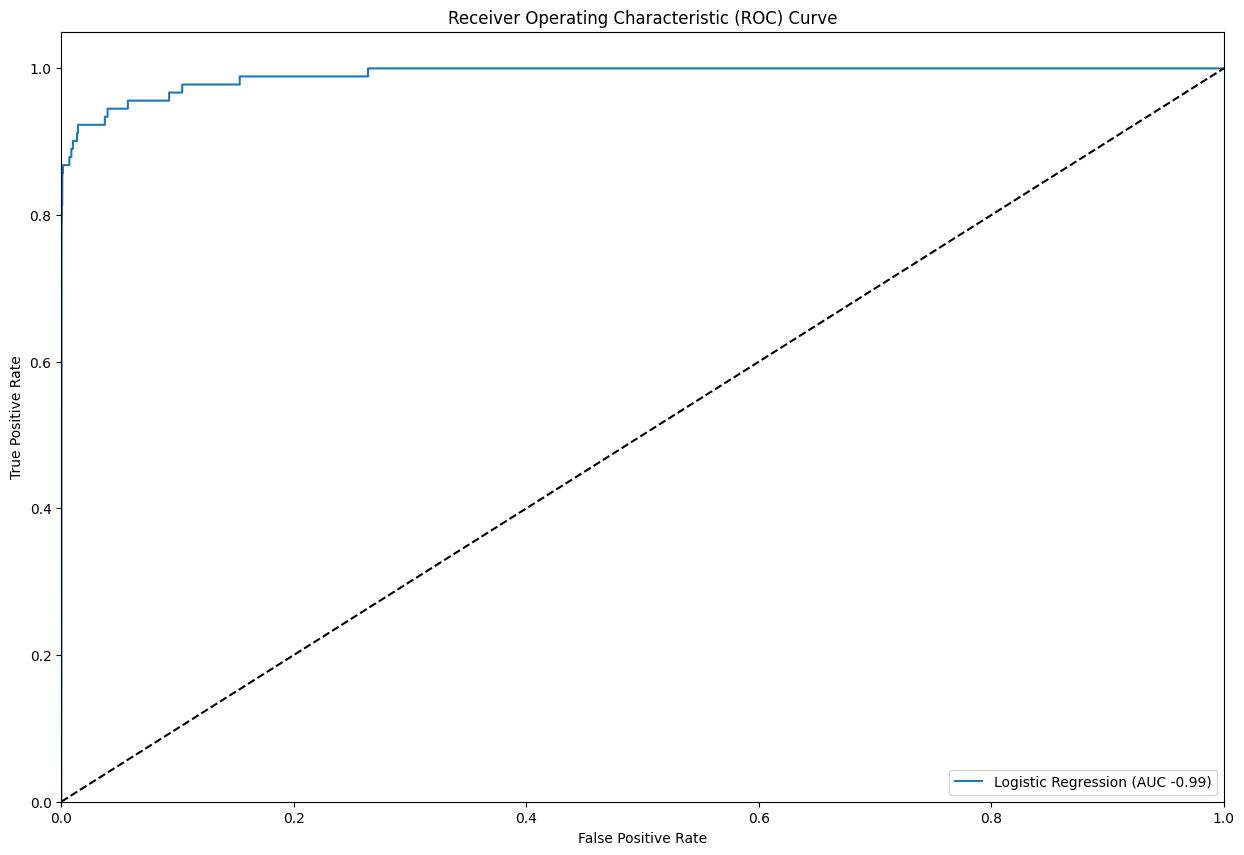

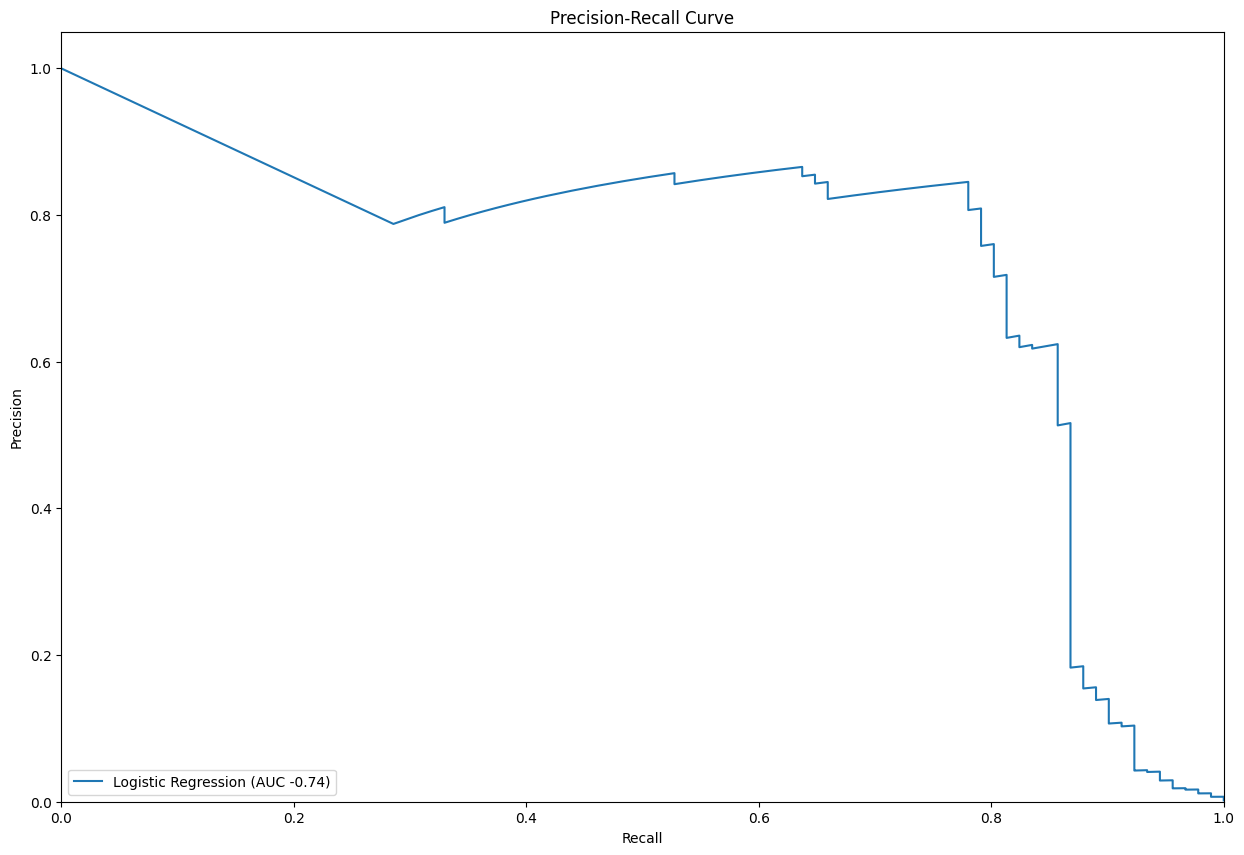

In [106]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc 
import matplotlib.pyplot as plt 

# Get the predicted probabilities for the positive class (fraud) from the logistic regression
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, threshold_roc = roc_curve(y_test, y_pred_prob_lr)

# Compute the precision, recall, and threshold for the Precision-Recall curve
precision, recall, threshold_pr = precision_recall_curve(y_test, y_pred_prob_lr)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Compute the area under the Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot the ROC curve 
plt.plot(fpr, tpr, label= 'Logistic Regression (AUC -%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # for a dashed line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
plt.plot(recall, precision, label= 'Logistic Regression (AUC -%0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.legend(loc="lower left")
plt.show()

### Decision Tree


In [36]:
import sklearn.tree

decision_tree = sklearn.tree.DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred_dt = decision_tree.predict(X_test)


In [38]:
print(classification_report(y_test, y_pred_dt))
print("AUC: ", roc_auc_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.48      0.78      0.59        91

    accuracy                           1.00     50581
   macro avg       0.74      0.89      0.80     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.8893473628767746


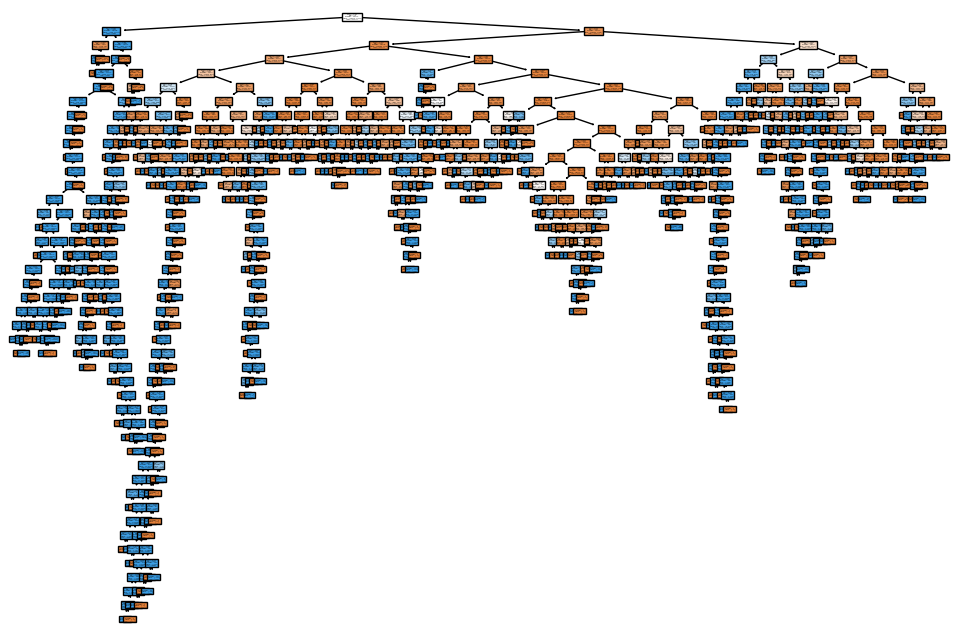

In [110]:
from sklearn.tree import plot_tree
feature_names = X.columns.tolist()
plt.figure(figsize=(12,8))
plot_tree(decision_tree, feature_names = feature_names,class_names= ['Genuine', 'Fraud'], filled = True)
plt.show()

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier


In [41]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [42]:
y_pred_rf = random_forest.predict(X_test)


In [43]:
print(classification_report(y_test, y_pred_rf))
print("AUC: ", roc_auc_score(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.91      0.85      0.87        91

    accuracy                           1.00     50581
   macro avg       0.95      0.92      0.94     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.9229976994682878


In [118]:
#get feature importances from the random forest model
feature_importances = random_forest.feature_importances_


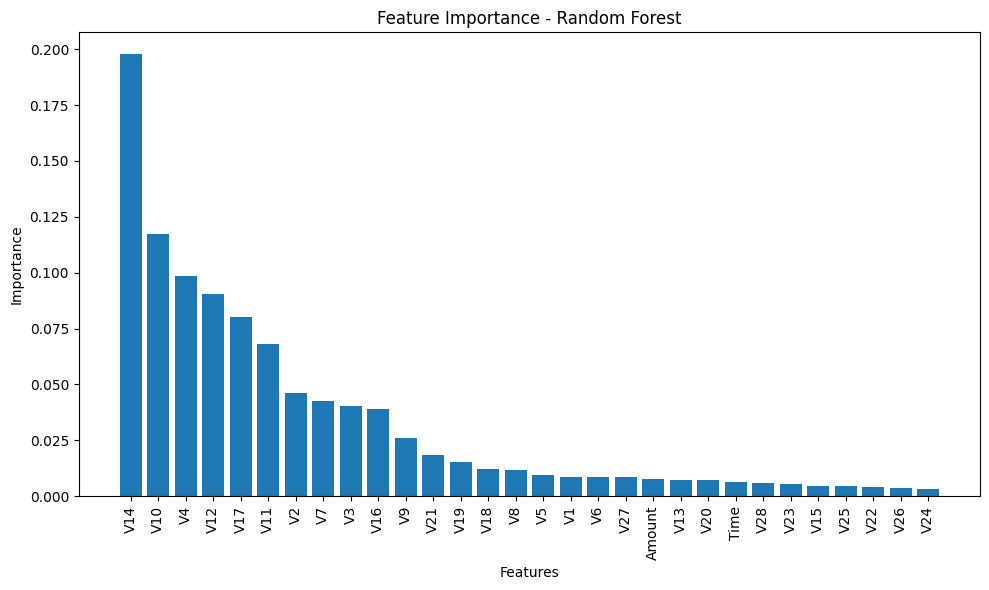

In [119]:
#sort featue importances in descending order
sorted_indices = feature_importances.argsort()[: : -1]
sorted_importances =  feature_importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

#plot the feature importances
plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importances)), sorted_importances)

# species the angles at which the x-axis labels are rotated
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()




## Gradient Boosting Machines

In [44]:

from sklearn.ensemble import GradientBoostingClassifier


In [46]:
gbm = GradientBoostingClassifier(random_state = 42)
gbm.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [47]:
y_pred_gbm = gbm.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_gbm))
print("AUC: ", roc_auc_score(y_test, y_pred_gbm))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     50490
           1       0.18      0.90      0.30        91

    accuracy                           0.99     50581
   macro avg       0.59      0.95      0.65     50581
weighted avg       1.00      0.99      0.99     50581

AUC:  0.9468160379925086


In [38]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [39]:
#Get the predicted probabilites for the positive class(fraud)
y_pred_prob_gbm = gbm.predict_proba(X_test)[:, 1]
#Compute the false positive rate, true positive rate, and threshold for the roc curve
fpr_gbm, tpr_gbm, thresholds_roc_gbm = roc_curve(y_test, y_pred_prob_gbm)
#Compute the Precision,recall and threshold for the Precision-recall curve
precision_gbm, recall_gbm, thresholds_pr_gbm = precision_recall_curve(y_test, y_pred_prob_gbm)
#Compute the area under the roc curve
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
#Compute the area under the precision-recall curve
pr_auc_gbm = auc(recall_gbm, precision_gbm)


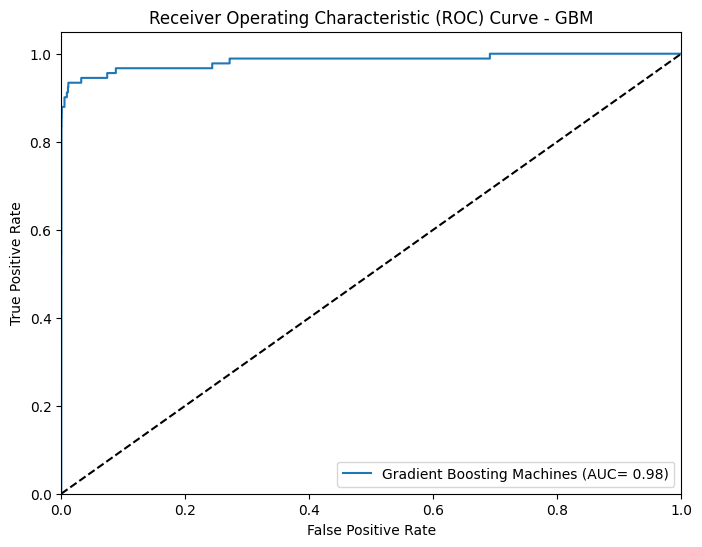

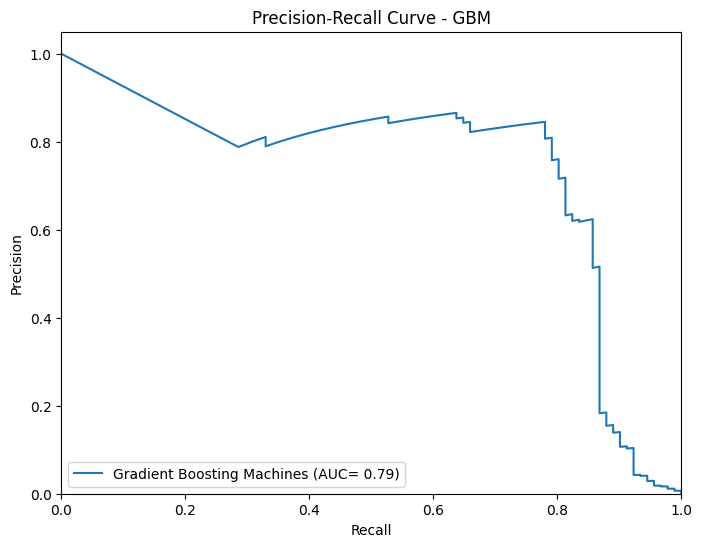

In [40]:
#plot the roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr_gbm, tpr_gbm, label="Gradient Boosting Machines (AUC= %0.2f)" % roc_auc_gbm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - GBM')
plt.legend(loc = "lower right")
plt.show()

#Plot the precision-recall curve
plt.figure(figsize = (8,6))
plt.plot(recall, precision, label ="Gradient Boosting Machines (AUC= %0.2f)" % pr_auc_gbm)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - GBM')
plt.legend(loc = "lower left")
plt.show()

## Support Vector Machines


In [49]:
from sklearn.svm import SVC

In [50]:
svm = SVC(random_state = 42)
svm.fit(X_train_resampled, y_train_resampled)


SVC(random_state=42)

In [51]:
y_pred_svm = svm.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred_svm))
print("AUC: ", roc_auc_score(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50490
           1       0.12      0.91      0.22        91

    accuracy                           0.99     50581
   macro avg       0.56      0.95      0.61     50581
weighted avg       1.00      0.99      0.99     50581

AUC:  0.950270535564653


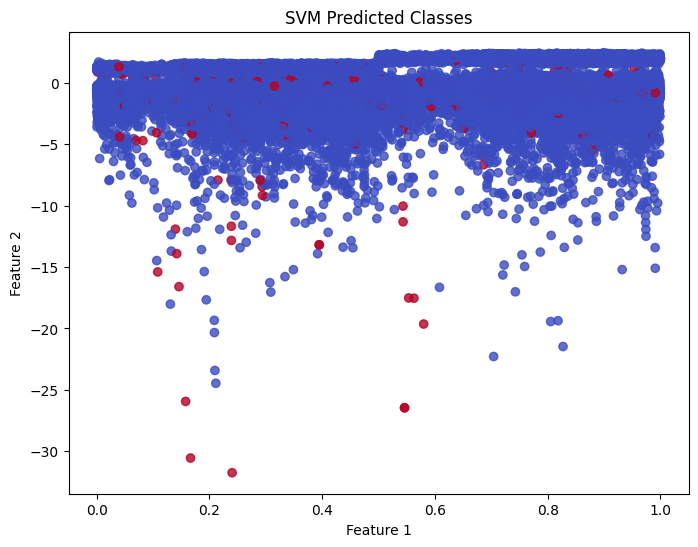

In [45]:
import numpy as np
import matplotlib.pyplot as plt

#Extract the two features for visualization
X_vis = X_test.iloc[ :, :2].values

#Make predictions on the test data using the SVM model
y_pred_svm = svm.predict(X_test)

#Create a scatter plot of the predicted classes
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_pred_svm, cmap = 'coolwarm', alpha =0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Predicted Classes')
plt.show()

## Model Comparison and Selection

In [26]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import matplotlib.pyplot as plt

In [32]:
# Creates a Data Frame for model comparison 
model_comparison = pd.DataFrame(columns = ['Model', 'Precision', 'Recall', 'F1 Score', 'AUPRC'])

# Logistic regression
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auprc_lr = average_precision_score(y_test, y_pred_lr)

new_row = pd.DataFrame({
    'Model' : 'Logistic Regression',
    'Precision' : precision_lr,
    'Recall' : recall_lr,
    'F1 Score' : f1_lr,
    'AUPRC' : auprc_lr
}, index=[0])

model_comparison = pd.concat([model_comparison, new_row], ignore_index=True)



In [39]:
# Desicion Tree
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auprc_dt = average_precision_score(y_test, y_pred_dt)

new_row = pd.DataFrame({
    'Model' : 'Desicion Tree',
    'Precision' : precision_dt,
    'Recall' : recall_dt,
    'F1 Score' : f1_dt,
    'AUPRC' : auprc_dt
}, index=[0])
model_comparison = pd.concat([model_comparison, new_row], ignore_index=True)



                        Model  Precision    Recall  F1 Score     AUPRC
2              Random Forests   0.905882  0.846154  0.875000  0.766793
1               Desicion Tree   0.479730  0.780220  0.594142  0.374690
3  Gradient Boosting Machines   0.178649  0.901099  0.298182  0.161159
4     Support Vector Machines   0.124625  0.912088  0.219287  0.113827
0         Logistic Regression   0.082192  0.923077  0.150943  0.076008


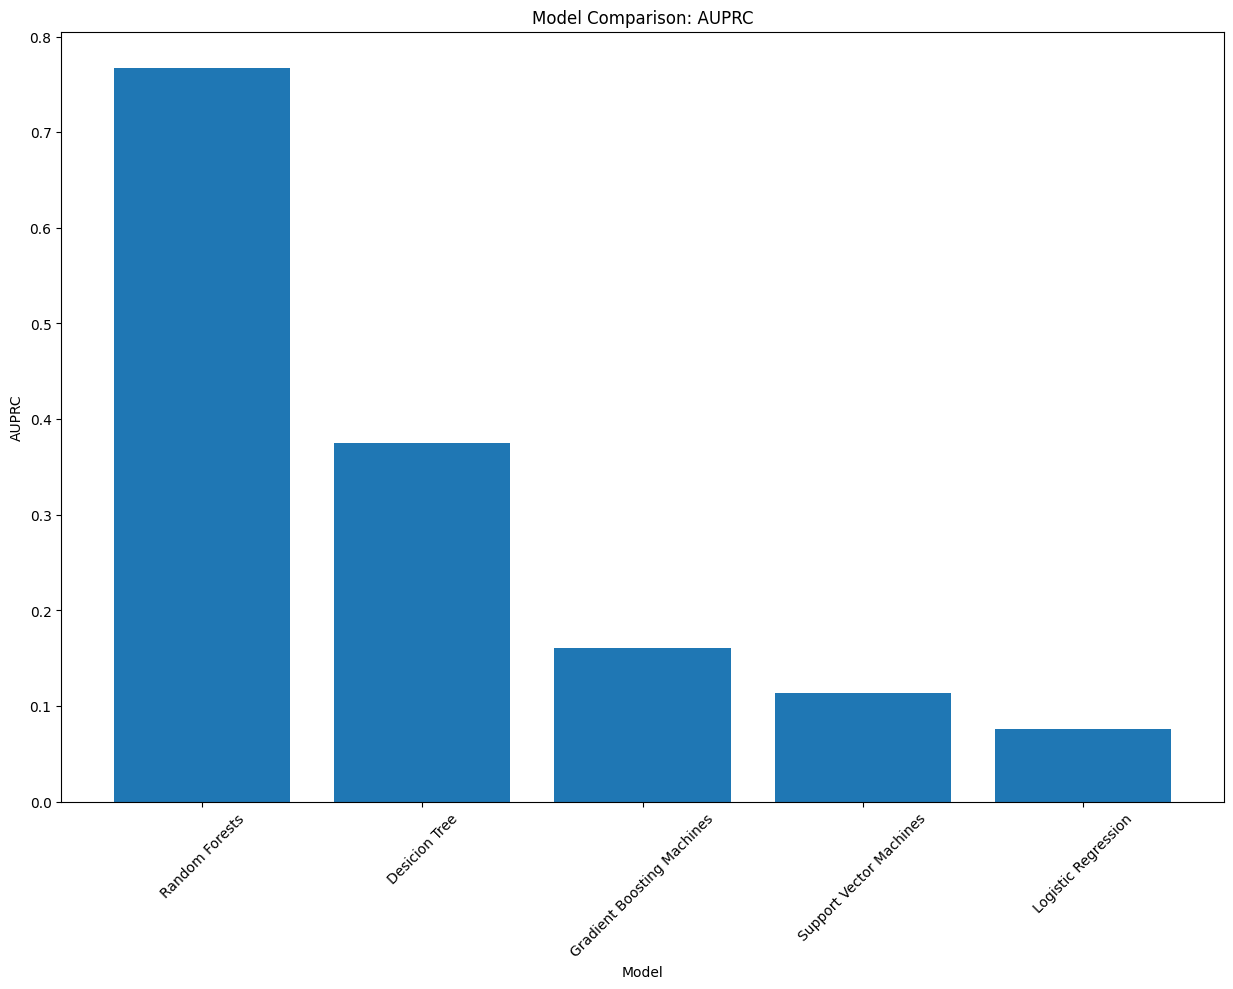

In [54]:
# Random Forests
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auprc_rf = average_precision_score(y_test, y_pred_rf)

new_row = pd.DataFrame({
    'Model': 'Random Forests',
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf,
    'AUPRC': auprc_rf
}, index=[0])
model_comparison = pd.concat([model_comparison, new_row], ignore_index=True)
# Gradient Boosting Machines (GBM)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
auprc_gbm = average_precision_score(y_test, y_pred_gbm)

new_row = pd.DataFrame({
    'Model': 'Gradient Boosting Machines',
    'Precision': precision_gbm,
    'Recall': recall_gbm,
    'F1 Score': f1_gbm,
    'AUPRC': auprc_gbm
},  index=[0])
model_comparison = pd.concat([model_comparison, new_row], ignore_index=True)
# Support Vector Machines (SVM)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auprc_svm = average_precision_score(y_test, y_pred_svm)

new_row = pd.DataFrame({
    'Model': 'Support Vector Machines',
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm,
    'AUPRC': auprc_svm
},index=[0])
model_comparison = pd.concat([model_comparison, new_row], ignore_index=True)
# Sort the Datarame by AUPRC
model_comparison = model_comparison.sort_values(by = 'AUPRC', ascending=False)

# Print the model comparison table 
print(model_comparison)

# Bar plot of the AUPRC Scores
plt.bar(model_comparison['Model'], model_comparison['AUPRC'])
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('AUPRC')
plt.title('Model Comparison: AUPRC')
plt.show()

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, accuracy_score 

#Make predictions on the test data using the Random Forest Model
y_pred_test_rf = random_forest.predict(X_test)

#Calculate Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf) 
f1_rf = f1_score(y_test, y_pred_rf)
auprc_rf = average_precision_score(y_test, y_pred_rf)

#Print the evaluation metrics
print("Random Forest Model Evaluation: ")
print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("f1: {:.4f}".format(f1_rf))
print("AUPRC: {:.4f}".format(auprc_rf))


Random Forest Model Evaluation: 
Accuracy: 0.9996
Precision: 0.9059
Recall: 0.8462
f1: 0.8750
AUPRC: 0.7668
